In [36]:
import os
import json
import numpy as np
from skimage import io, transform, util
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from freiburg_net import *
from bbox3D_to_bbox2D import to_bbox2D

In [65]:
# load weights
checkpoint_path = "EfficientB0_freiburg.h5"
model = tf.keras.models.load_model(checkpoint_path)

## Helper function

In [2]:
# Lookup table class name to class id
class_name2id = {
	"corn": 0,
	"flour": 1,
	"fish": 2,
	"sugar": 3,
	"beans": 4,
	"oil": 5,
	"rice": 6,
	"vinegar": 7,
	"cake": 8,
	"milk": 9,
	"nuts": 10,
	"tomato_sauce": 11,
	"pasta": 12,
	"soda": 13,
	"chips": 14,
	"honey": 15,
	"spices": 16,
	"jam": 17,
	"water": 18,
	"cereal": 19,
	"tea": 20,
	"coffee": 21,
	"juice": 22,
	"chocolate": 23,
	"candy": 24,
}

def class_name_from_id(id):
    for key, value in class_name2id.items():
        if value == id:
            return key

### Load image and camera intrinsics

In [11]:
# open labels dict for that image/PointCloud
pcd_dir = "../pcd/pointclouds_from_420726_09052021"
filename = "0"
labels_path = os.path.join(pcd_dir, filename) + ".json"
with open(labels_path, "r") as f:
    pc_label = json.load(f)

# read the camera intrinsic parameters
camintrinsics_fname = "camera_intrinsics.json"
camintrinsics_path = os.path.join(pcd_dir, camintrinsics_fname)
with open(camintrinsics_path, "r") as f:
    intrinsics = json.load(f)

# image in which to make inference
img_path = os.path.join(pcd_dir, filename + ".png")
img = io.imread(img_path)

In [5]:
for cluster in pc_label["annotation"]:
    try:
        # point to relative coordinates
        x, y, width, height = to_bbox2D(cluster["bbox"], img.shape[:2], intrinsics)
        crop = img[y:y + height, x:x + width, :] / 255
        crop = transform.resize(crop, (256, 256))
        # inference on the crop
        img_array = tf.expand_dims(crop, 0) # create a batch
        pred = model.predict(img_array)
        category_id = np.argmax(pred[0]) # prediction int
        score = pred[0][category_id]

        plt.imshow(crop)
        plt.title( f"Class: {class_name_from_id(category_id)} -> {str(score)}" )
        plt.show()
    except Exception as e:
        print(f"Error! x:{x}, y:{y}, width:{width}, height:{height}")
        print("\t", e)

Error! x:486, y:123, width:96, height:159
	 name 'model' is not defined
Error! x:787, y:295, width:-37, height:94
	 ('Cannot warp empty image with dimensions', (94, 0, 3))
Error! x:278, y:235, width:103, height:148
	 name 'model' is not defined
Error! x:276, y:95, width:40, height:134
	 name 'model' is not defined
Error! x:137, y:239, width:169, height:130
	 name 'model' is not defined
Error! x:98, y:432, width:628, height:46
	 name 'model' is not defined
Error! x:562, y:140, width:34, height:136
	 name 'model' is not defined
Error! x:413, y:293, width:47, height:77
	 name 'model' is not defined
Error! x:291, y:81, width:92, height:99
	 name 'model' is not defined
Error! x:211, y:462, width:112, height:9
	 name 'model' is not defined
Error! x:583, y:315, width:38, height:66
	 name 'model' is not defined
Error! x:767, y:452, width:42, height:25
	 name 'model' is not defined
Error! x:671, y:316, width:30, height:66
	 name 'model' is not defined
Error! x:499, y:282, width:39, height:91
	 

## Testing with other images

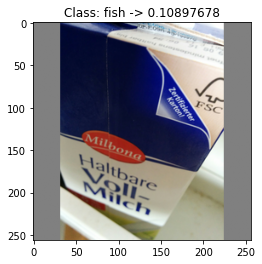

In [60]:
img_path = "/media/david/TOSHIBA EXT/DavidINLOC/tfmdbs/freiburg_groceries_dataset/images/MILK/MILK0001.png"
img = io.imread(img_path) / 255

img = transform.resize(img, (256, 256))
# inference on the img
img_array = tf.expand_dims(img, 0) # create a batch
pred = model.predict(img_array)
category_id = np.argmax(pred[0]) # prediction int
score = pred[0][category_id]

plt.imshow(img)
plt.title( f"Class: {class_name_from_id(category_id)} -> {str(score)}" )
plt.show()

# SIFT

0


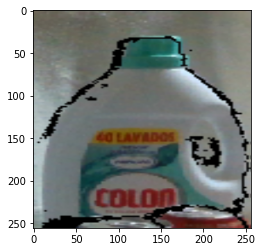

Error! x:787, y:295, width:-37, height:94
	 ('Cannot warp empty image with dimensions', (94, 0, 3))
1


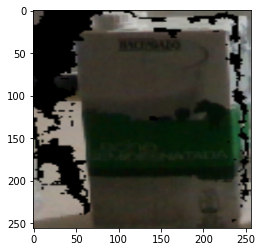

2


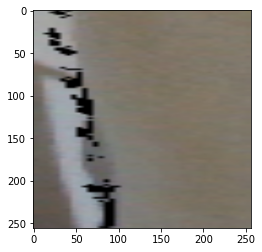

3


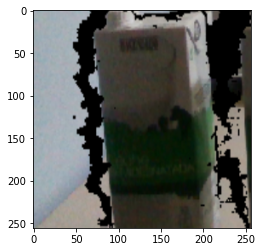

4


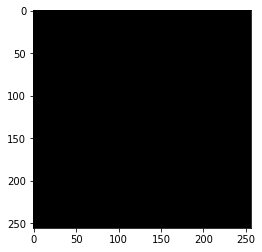

5


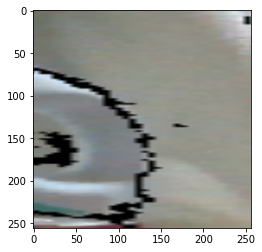

6


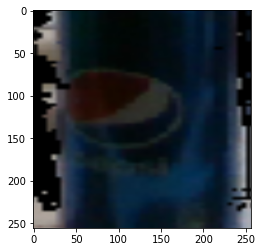

7


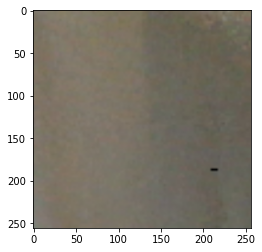

8


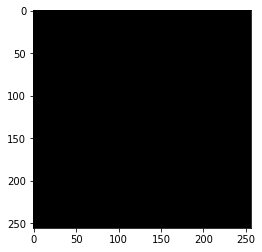

9


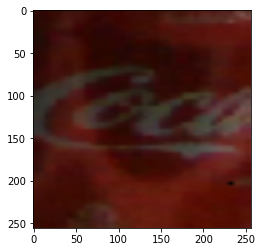

10


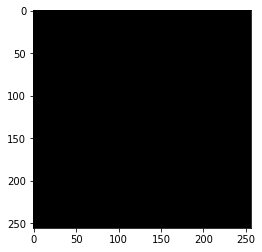

11


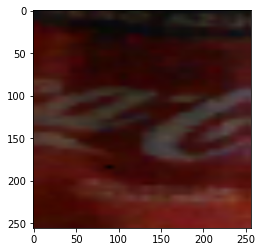

12


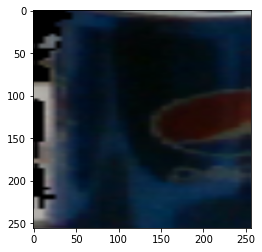

13


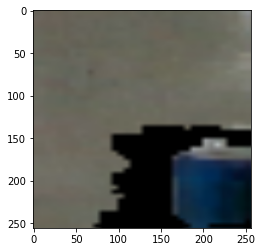

14


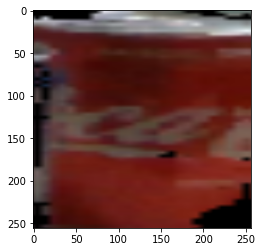

15


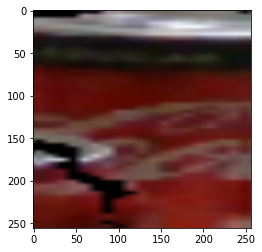

16


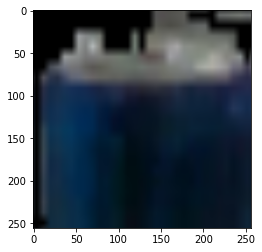

uint8


In [44]:
# open labels dict for that image/PointCloud
pcd_dir = "../pcd/pointclouds_from_420726_09052021"
filename = "0"
labels_path = os.path.join(pcd_dir, filename) + ".json"
with open(labels_path, "r") as f:
    pc_label = json.load(f)

# read the camera intrinsic parameters
camintrinsics_fname = "camera_intrinsics.json"
camintrinsics_path = os.path.join(pcd_dir, camintrinsics_fname)
with open(camintrinsics_path, "r") as f:
    intrinsics = json.load(f)

# image in which to make inference
img_path = os.path.join(pcd_dir, filename + ".png")
img = util.img_as_ubyte(io.imread(img_path))

crops = []; i = 0
for cluster in pc_label["annotation"]:
    try:
        # point to relative coordinates
        x, y, width, height = to_bbox2D(cluster["bbox"], img.shape[:2], intrinsics)
        crop = img[y:y + height, x:x + width, :]
        crop = util.img_as_ubyte(transform.resize(crop, (256, 256)))
        crops.append(crop)
        print(i)
        plt.imshow(crop)
        plt.show()
        i += 1
    except Exception as e:
        print(f"Error! x:{x}, y:{y}, width:{width}, height:{height}")
        print("\t", e)

Not enough matches are found - 1/10


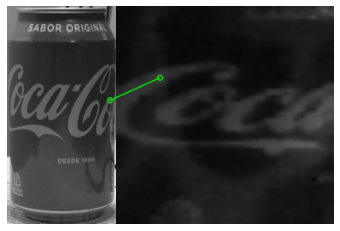

In [112]:
# query image
img = cv2.imread("../img/cocacola_model.jpeg")
img = util.img_as_ubyte(transform.resize(img, (256, 128)))
imGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# scene image
scene = cv2.imread("../img/cocacola0_pack.jpg")
scene = crops[9]
scGray = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)

# find the keypoints and descriptors with SIFT
sift = cv2.SIFT_create()
imKp, imDes = sift.detectAndCompute(imGray, None)
scKp, scDes = sift.detectAndCompute(scGray, None)

# draw the keypoints for the query image
kpsImg = cv2.drawKeypoints(imGray, imKp, img, 
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)	
# use FLANN for knn-based matching
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(imDes, scDes, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
goodMatches = []
for m, n in matches:
    if m.distance < 0.8*n.distance:
        goodMatches.append(m)

min_matches = 10
if len(goodMatches) >= min_matches:
    src_pts = np.float32([ imKp[m.queryIdx].pt for m in goodMatches ]).reshape(-1,1,2)
    dst_pts = np.float32([ scKp[m.trainIdx].pt for m in goodMatches ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = imGray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    scGray = cv2.polylines(scGray, [np.int32(dst)], True, 0, 3, cv2.LINE_AA)

else:
    print( "Not enough matches are found - {}/{}".format(len(goodMatches), min_matches) )
    matchesMask = None

draw_params = dict(
    matchColor = (0,255,0), # draw matches in green color
    singlePointColor = None,
    matchesMask = matchesMask, # draw only inliers
    flags = 2)

matchesDrawn = cv2.drawMatches(imGray, imKp, scGray, scKp, goodMatches, None, **draw_params)

plt.imshow(matchesDrawn)
plt.axis('off')
plt.savefig('../../report/images/sift_cocacola_crop.png')
plt.show()